In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

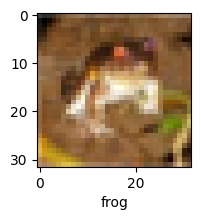

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
plot_sample(X_train, y_train, 0)

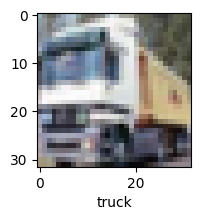

In [10]:
plot_sample(X_train, y_train, 1)

In [11]:
#Normalizing the training data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
#Build simple artificial neural network for image classification
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 156s 99ms/step - accuracy: 0.3046 - loss: 1.9339
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 195s 95ms/step - accuracy: 0.4197 - loss: 1.6430
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 95ms/step - accuracy: 0.4524 - loss: 1.5563
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 212s 101ms/step - accuracy: 0.4720 - loss: 1.4903
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 193s 95ms/step - accuracy: 0.4923 - loss: 1.4421


In [13]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.41      0.67      0.51      1000
           1       0.47      0.74      0.58      1000
           2       0.38      0.31      0.34      1000
           3       0.36      0.30      0.33      1000
           4       0.55      0.26      0.35      1000
           5       0.43      0.32      0.37      1000
           6       0.54      0.51      0.53      1000
           7       0.51      0.59      0.55      1000
           8       0.55      0.66      0.60      1000
           9       0.57      0.37      0.45      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.46     10000
weighted avg       0.48      0.47      0.46     10000



In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 45ms/step - accuracy: 0.4017 - loss: 1.6539
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 43ms/step - accuracy: 0.6109 - loss: 1.1064
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.6668 - loss: 0.9586
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.7046 - loss: 0.8603
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7275 - loss: 0.7853
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7519 - loss: 0.7115
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.7716 - loss: 0.6534
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7836 - loss: 0.6122
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.8046 - loss: 0.5581
Epoch 10/10
 750/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 42ms/step - accuracy: 0.8208 - loss: 0.5128

In [16]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.7011 - loss: 0.9422


[0.9415441155433655, 0.698199987411499]

In [18]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


array([[4.02336482e-05, 3.10630776e-06, 6.09405106e-04, 9.46620882e-01,
        5.17727822e-05, 5.07802591e-02, 1.23451208e-03, 1.07934775e-05,
        6.46593806e-04, 2.36535925e-06],
       [4.65866225e-03, 1.04886887e-03, 2.00602074e-07, 7.68216690e-09,
        8.76199380e-08, 3.59103615e-11, 6.37432329e-11, 9.34769040e-10,
        9.94275451e-01, 1.66923237e-05],
       [8.15096796e-02, 1.07982822e-01, 2.13633827e-03, 1.80012621e-02,
        1.06716417e-02, 5.02560474e-03, 6.45966575e-05, 9.23749618e-03,
        7.45840967e-01, 1.95295159e-02],
       [9.40389276e-01, 2.47572828e-03, 1.54893082e-02, 4.99106711e-04,
        3.36379372e-02, 1.13291069e-04, 8.87013084e-06, 1.97994726e-04,
        7.05303391e-03, 1.35413720e-04],
       [3.92658740e-06, 1.82494387e-05, 2.11869995e-03, 4.82363813e-03,
        9.76325333e-01, 1.35494419e-03, 1.53442780e-02, 2.37776044e-06,
        8.34378352e-06, 1.39252492e-07]], dtype=float32)

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(4)]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

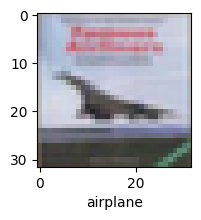

In [21]:

plot_sample(X_test, y_test,3)

In [22]:
classes[y_classes[3]]

'airplane'

In [23]:
classes[y_classes[3]]

'airplane'